In [1]:
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
filepath = 'datasets/DC_Properties.csv'

In [3]:
df = pd.read_csv(filepath)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


Use the D.C. Residential Properties dataset (Links to an external site.) from Kaggle to re-scale the "price" column using both z-score standardization and Min-max scaling.

HINTS: Replace or remove the missing values in the data.

In [4]:
df.describe()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,158957.000000,158957.000000,158957.000000,106696.000000,158957.000000,158957.000000,158686.000000,80928.000000,158957.000000,106652.000000,...,158957.000000,158957.000000,52261.000000,52261.000000,158956.000000,158956.000000,158956.000000,158956.000000,158720.000000,158720.000000
mean,79478.000000,1.810678,0.458237,1.198039,6.187736,2.732506,1941.987579,1998.243537,1963.718024,2.091793,...,14.252999,2473.282158,2371.544249,888.834542,20012.694563,38.914854,-77.016676,5348.216324,-77.016712,38.914846
std,45887.077707,0.976396,0.587571,0.596924,2.618165,1.358864,33.640234,16.575786,24.923150,2.933323,...,3.725736,5059.046023,1114.272364,420.185822,15.627084,0.031723,0.040938,3369.645953,0.040933,0.031682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,...,11.000000,0.000000,1001.000000,0.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,39739.000000,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1985.000000,1954.000000,2.000000,...,11.000000,697.000000,1501.000000,616.000000,20007.000000,38.895425,-77.042892,2102.000000,-77.042894,38.895432
50%,79478.000000,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,2004.000000,1963.000000,2.000000,...,13.000000,1649.000000,2265.000000,783.000000,20011.000000,38.915337,-77.019596,5201.000000,-77.019581,38.915229
75%,119217.000000,2.000000,1.000000,1.000000,7.000000,3.000000,1960.000000,2010.000000,1975.000000,2.000000,...,17.000000,3000.000000,2910.000000,1060.000000,20018.000000,38.936075,-76.988626,8302.000000,-76.988842,38.936077
max,158956.000000,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,...,117.000000,942632.000000,5621.000000,8553.000000,20392.000000,38.995540,-76.909758,11100.000000,-76.910511,38.993646


In [5]:
df.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [6]:
missing = df['PRICE'].isnull()
df.loc[missing]

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
6,6,1,0,Warm Cool,Y,2.0,5,2,1917.0,1988.0,...,-77.041055,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
9,9,1,1,Hot Water Rad,Y,1.0,6,2,1908.0,1979.0,...,-77.040081,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
10,10,3,0,Forced Air,N,3.0,12,5,1890.0,1950.0,...,-77.040760,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
11,11,5,0,Hot Water Rad,Y,3.0,16,6,1905.0,NaN,...,-77.039718,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
12,12,2,0,Hot Water Rad,N,2.0,9,5,1894.0,1979.0,...,-77.039569,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
13,13,2,0,Warm Cool,Y,2.0,11,5,1885.0,1979.0,...,-77.039644,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
15,15,2,1,Warm Cool,Y,2.0,9,4,1908.0,1990.0,...,-77.039784,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
17,17,2,0,Hot Water Rad,N,1.0,6,3,1908.0,1987.0,...,-77.039961,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW


In [7]:
len(df)

158957

In [8]:
# remove missing values
dcdf = df.dropna(subset = ['PRICE'])
len(dcdf)

98216

In [18]:
df['PRICE'].mean()

931351.5949336156

#### z-score & min-max

In [9]:
scaler = StandardScaler()
price_zscore = scaler.fit_transform(dcdf[['PRICE']])

In [10]:
price_col = pd.Series(price_zscore.reshape(-1))

In [11]:
price_col.head()

0    0.023175
1    0.165501
2    0.094975
3    0.144258
4    0.016803
dtype: float64

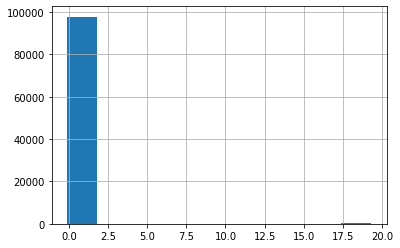

In [12]:
price_col.hist()

In [13]:
minmax_sc = MinMaxScaler()

In [14]:
price_minmax = minmax_sc.fit_transform(dcdf[['PRICE']])

In [15]:
prx_mm_col = pd.Series(price_minmax.reshape(-1))
prx_mm_col.head()

0    0.007968
1    0.015281
2    0.011657
3    0.014189
4    0.007640
dtype: float64

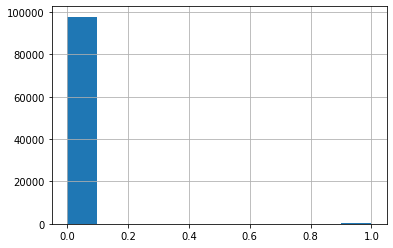

In [16]:
prx_mm_col.hist()

In [17]:
prx_mm_col.head()

0    0.007968
1    0.015281
2    0.011657
3    0.014189
4    0.007640
dtype: float64